<a href="https://colab.research.google.com/github/EGC01/regresionLineal/blob/main/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
url="https://raw.githubusercontent.com/EGC01/regresionLineal/main/datos.csv"
data = pd.read_csv(url)


In [3]:
data.shape


(440, 8)

In [4]:
data.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
data.dtypes


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
indices = [46,156,292]
muestras = pd.DataFrame(data.loc[indices],
                        columns = data.keys()).reset_index(drop = True)
data = data.drop(indices, axis = 0)

In [7]:
data = data.drop(['Region', 'Channel'], axis = 1)

In [8]:
muestras = muestras.drop(['Region', 'Channel'], axis = 1)

In [9]:
data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [10]:
X = data_escalada.copy()

In [11]:
inercia = []
for i in range(1,20):
  algoritmo = KMeans(n_clusters= i, init='k-means++',
                     max_iter = 300, n_init = 10)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

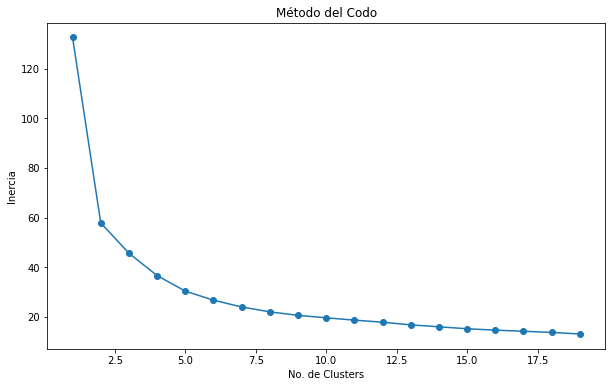

In [12]:
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker = 'o')
plt.show()

In [13]:
algoritmo = KMeans(n_clusters= 6, init='k-means++',
                     max_iter = 300, n_init = 10)

In [14]:
algoritmo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [16]:
muestra_prediccion = algoritmo.predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
  print("Muestra", i, "se encuentra en el cluster:", pred)

Muestra 0 se encuentra en el cluster: 5
Muestra 1 se encuentra en el cluster: 5
Muestra 2 se encuentra en el cluster: 2


In [17]:
modelo_pca = PCA(n_components= 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

centroides_pca = modelo_pca.transform(centroides)

colores = ['blue', 'red', 'green', 'orange', 'gray','brown']

colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]



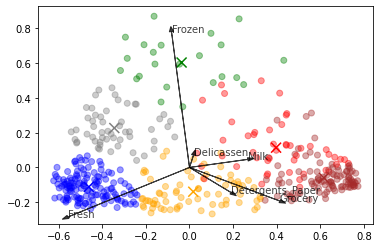

In [18]:
plt.scatter(pca[:,0], pca[:,1], c = colores_cluster,
            marker = 'o', alpha = 0.4)

plt.scatter(centroides_pca[:,0], centroides_pca[:,1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

for i in range(len(columnas)):
  plt.arrow(0,0, xvector[i], yvector[i], color = 'black',
            width = 0.0005, head_width = 0.02, alpha = 0.75)
  plt.text(xvector[i], yvector[i], list(columnas)[i], color = 'black',
           alpha = 0.75)
plt.show()